In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [91]:
from sklearn import datasets 

In [52]:
train = pd.read_csv('fake.csv')

In [28]:
train.describe()

,ord_in_thread,domain_rank,spam_score,replies_count,participants_count,likes,comments,shares
count,12999.000000,8776.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000
mean,0.891530,38092.996582,0.026122,1.383183,1.727518,10.831833,0.038311,10.831833
std,6.486822,26825.487454,0.122889,9.656838,6.884239,79.798949,0.827335,79.798949
min,0.000000,486.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,17423.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,34478.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,60570.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,100.000000,98679.000000,1.000000,309.000000,240.000000,988.000000,65.000000,988.000000


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12999 entries, 0 to 12998
Data columns (total 20 columns):
uuid                  12999 non-null object
ord_in_thread         12999 non-null int64
author                10575 non-null object
published             12999 non-null object
title                 12319 non-null object
text                  12953 non-null object
language              12999 non-null object
crawled               12999 non-null object
site_url              12999 non-null object
country               12823 non-null object
domain_rank           8776 non-null float64
thread_title          12987 non-null object
spam_score            12999 non-null float64
main_img_url          9356 non-null object
replies_count         12999 non-null int64
participants_count    12999 non-null int64
likes                 12999 non-null int64
comments              12999 non-null int64
shares                12999 non-null int64
type                  12999 non-null object
dtypes: float64(2

In [102]:
train.head(1220)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,f4def2e2fd494ce14924c6142a4ac823c3d6c579,0,Elisabeth Parker,2016-11-01T02:45:00.000+02:00,Teacher To 11 yr Old: 'I Can't Wait Until Trum...,"0 427 \n“That’s going to be you,” the Academy ...",english,2016-11-01T12:42:58.123+02:00,bipartisanreport.com,US,7587.0,Teacher To 11 yr Old: 'I Can't Wait Until Trum...,0.012,http://cdn.bipartisanreport.com/wordpress/wp-c...,0,0,0,0,0,bs
1216,f92bf32cd05c601401feb645314910ab875ac932,0,Caleb R. Newton,2016-10-30T19:14:00.000+02:00,"Trump Supporters Lose Control, Violently Haras...",0 407 \nAn unidentified supporter of Republica...,english,2016-11-01T16:55:37.912+02:00,bipartisanreport.com,US,7587.0,"Trump Supporters Lose Control, Violently Haras...",0.190,http://cdn.bipartisanreport.com/wordpress/wp-c...,0,0,0,0,0,bs
1217,5ed995f7a8f0033b7d1bbae26d36f487d14020d3,0,Elisabeth Parker,2016-11-01T20:05:00.000+02:00,Donald Trump Hit With VERY Shady Voter Intimid...,0 1661 \nDonald Trump wants so-called “poll wa...,english,2016-11-04T05:05:09.842+02:00,bipartisanreport.com,US,7587.0,Donald Trump Hit With VERY Shady Voter Intimid...,0.781,http://cdn.bipartisanreport.com/wordpress/wp-c...,0,0,0,0,0,bs
1218,36cd13a9c977fa8412c96a3b7f09143d1f3e2895,0,NaN,2016-11-05T03:20:00.000+02:00,BREAKING: Trump Announces DEVASTATING Cuts To ...,0 419 \nSocial Security is the lifeline of man...,english,2016-11-05T09:26:35.027+02:00,bipartisanreport.com,FR,7587.0,BREAKING: Trump Announces DEVASTATING Cuts To ...,0.000,http://cdn.bipartisanreport.com/wordpress/wp-c...,0,0,0,0,0,bs


In [31]:
train.describe()

,ord_in_thread,domain_rank,spam_score,replies_count,participants_count,likes,comments,shares
count,12999.000000,8776.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000
mean,0.891530,38092.996582,0.026122,1.383183,1.727518,10.831833,0.038311,10.831833
std,6.486822,26825.487454,0.122889,9.656838,6.884239,79.798949,0.827335,79.798949
min,0.000000,486.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,17423.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,34478.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,60570.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,100.000000,98679.000000,1.000000,309.000000,240.000000,988.000000,65.000000,988.000000


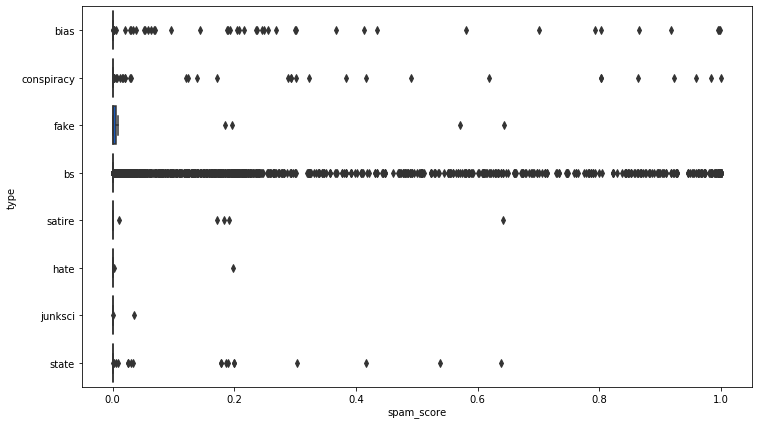

In [85]:
plt.figure(figsize=(12,7))
sns.boxplot(y='type', x='spam_score', data=train, palette='winter')

In [64]:
dep = pd.read_csv('fake.csv')
dep.drop(["crawled","site_url","country","domain_rank","replies_count","shares","thread_title","main_img_url","uuid","text","title","language", "ord_in_thread","published","author", "comments", "likes", "participants_count"], axis = 1, inplace = True) 
dep
#print(data)

,spam_score,type
0,0.000,bias
1,0.000,bias
2,0.000,bias
3,0.068,bias
4,0.865,bias
...,...,...
12994,0.000,bs
12995,0.000,bs
12996,0.000,bs
12997,0.000,bs


In [66]:
ind = pd.read_csv('fake.csv')
ind.drop(["country","domain_rank","replies_count","shares","thread_title","main_img_url","title","language", "ord_in_thread","published","type","spam_score", "comments", "likes", "participants_count"], axis = 1, inplace = True) 
ind

,uuid,author,text,crawled,site_url
0,6a175f46bcd24d39b3e962ad0f29936721db70db,Barracuda Brigade,Print They should pay all the back all the mon...,2016-10-27T01:49:27.168+03:00,100percentfedup.com
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,reasoning with facts,Why Did Attorney General Loretta Lynch Plead T...,2016-10-29T08:47:11.259+03:00,100percentfedup.com
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,Barracuda Brigade,Red State : \nFox News Sunday reported this mo...,2016-10-31T01:41:49.479+02:00,100percentfedup.com
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,Fed Up,Email Kayla Mueller was a prisoner and torture...,2016-11-01T15:46:26.304+02:00,100percentfedup.com
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,Fed Up,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,2016-11-01T23:59:42.266+02:00,100percentfedup.com
...,...,...,...,...,...
12994,f1b5d0e44803f48732bde854a9fdf95837219b12,replaceme,It DOES allow you to put a dog face on top of ...,2016-10-27T00:37:46.194+03:00,zerohedge.com
12995,36011ceba3647e1bea78299b68b6fb705a1fc1ad,Freedumb,Wait till you see what happens to the valuatio...,2016-10-27T00:37:46.220+03:00,zerohedge.com
12996,6995d1aa9ac99926106489b14b5530e85358059a,major major maj...,I'm waiting for the one that puts a pussy on m...,2016-10-27T00:37:46.244+03:00,zerohedge.com
12997,7de8ae90eee164eb756db6c8a3772288e11d7a94,beemasters,$4 Billion even after they are known to be kee...,2016-10-27T00:37:46.247+03:00,zerohedge.com


In [70]:
df = pd.DataFrame(train)
pd

<module 'pandas' from '/home/yo-sayantan/.local/lib/python3.7/site-packages/pandas/__init__.py'>

<Figure size 864x864 with 0 Axes>

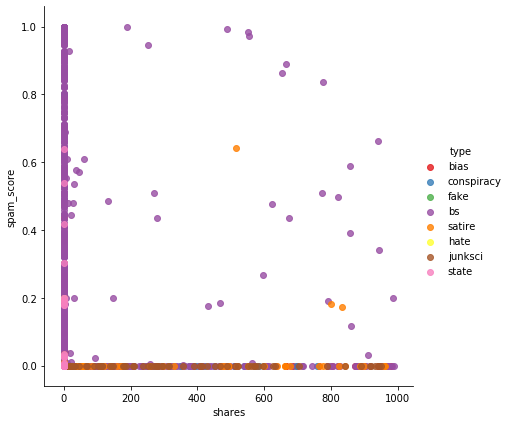

In [80]:
plt.figure(figsize=(12,12))
sns.lmplot(y='spam_score', x='shares', data=train, palette='Set1', hue='type', size=6, aspect=1, fit_reg=False)

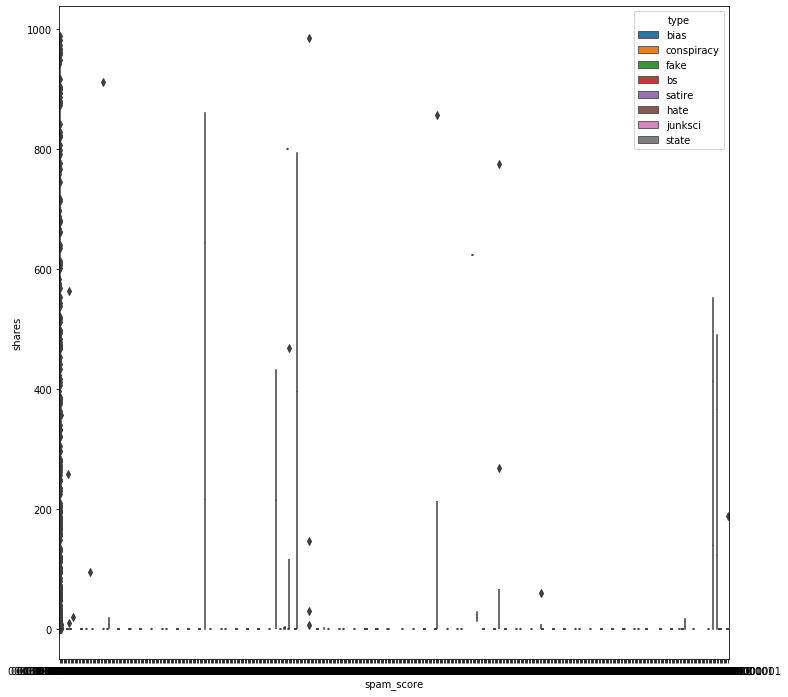

In [82]:
plt.figure(figsize=(12,12))
sns.boxplot(x='spam_score', y='shares', data=train, hue='type')

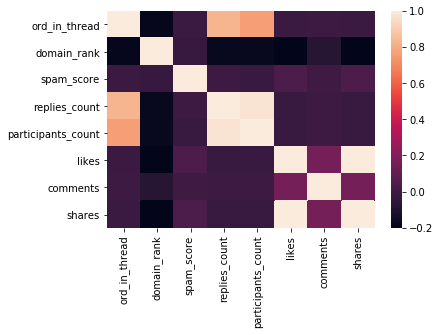

In [88]:
t= train.corr()
sns.heatmap(t)

In [97]:
#tips=load_dataset('dep')
ind.head(100)

,uuid,author,text,crawled,site_url
0,6a175f46bcd24d39b3e962ad0f29936721db70db,Barracuda Brigade,Print They should pay all the back all the mon...,2016-10-27T01:49:27.168+03:00,100percentfedup.com
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,reasoning with facts,Why Did Attorney General Loretta Lynch Plead T...,2016-10-29T08:47:11.259+03:00,100percentfedup.com
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,Barracuda Brigade,Red State : \nFox News Sunday reported this mo...,2016-10-31T01:41:49.479+02:00,100percentfedup.com
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,Fed Up,Email Kayla Mueller was a prisoner and torture...,2016-11-01T15:46:26.304+02:00,100percentfedup.com
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,Fed Up,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,2016-11-01T23:59:42.266+02:00,100percentfedup.com
...,...,...,...,...,...
95,51885985bf02be49ebfd1c78485babfd09c25f90,Anonymous,The second video (bottom one ) proves what Tru...,2016-10-30T02:45:32.702+02:00,abeldanger.net
96,926b9b1371903ad912ce189712d5ba5cfa1bf665,Anonymous,iTS DARK ALRIGHT . In a sad twist of fate thes...,2016-10-30T02:45:38.655+02:00,abeldanger.net
97,3ad02a79678325091fca526f388553b72a977561,Anonymous,The second video (bottom one ) proves what Tru...,2016-10-30T02:45:38.673+02:00,abeldanger.net
98,5876d2342903b7d1aa341d851073a7a9d3cbe253,Anonymous,Brilliant!,2016-10-30T03:42:21.211+02:00,abeldanger.net


In [99]:
train.corr()

,ord_in_thread,domain_rank,spam_score,replies_count,participants_count,likes,comments,shares
ord_in_thread,1.000000,-0.184794,-0.018859,0.830462,0.760739,-0.018657,-0.006365,-0.018657
domain_rank,-0.184794,1.000000,-0.027991,-0.174894,-0.177657,-0.201984,-0.076436,-0.201984
spam_score,-0.018859,-0.027991,1.000000,-0.007477,-0.019813,0.041199,-0.004444,0.041199
replies_count,0.830462,-0.174894,-0.007477,1.000000,0.971898,-0.019056,-0.006595,-0.019056
participants_count,0.760739,-0.177657,-0.019813,0.971898,1.000000,-0.020136,-0.008447,-0.020136
likes,-0.018657,-0.201984,0.041199,-0.019056,-0.020136,1.000000,0.158758,1.000000
comments,-0.006365,-0.076436,-0.004444,-0.006595,-0.008447,0.158758,1.000000,0.158758
shares,-0.018657,-0.201984,0.041199,-0.019056,-0.020136,1.000000,0.158758,1.000000


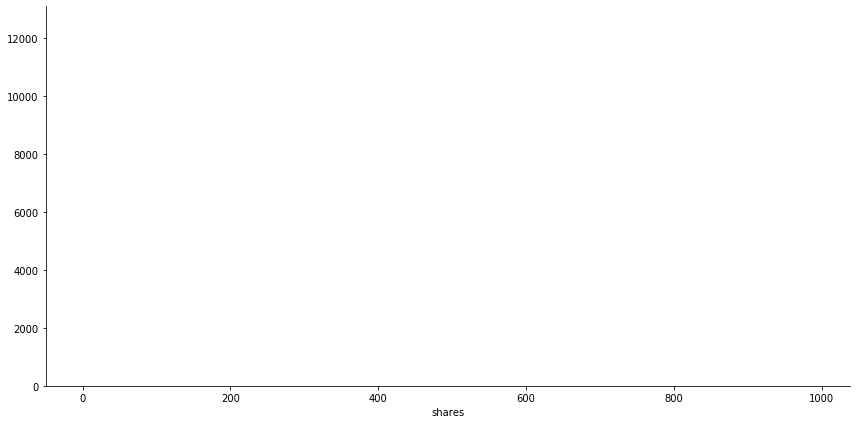

In [106]:
g = sns.FacetGrid(train,hue='likes',palette='Set1',size=6,aspect=2)
g = g.map(plt.hist,'shares',bins=20,alpha=0.5)